In [10]:
 # Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
salaries_df = pd.read_csv('salaries.csv')
salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
18051,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
18052,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
18053,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
18054,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


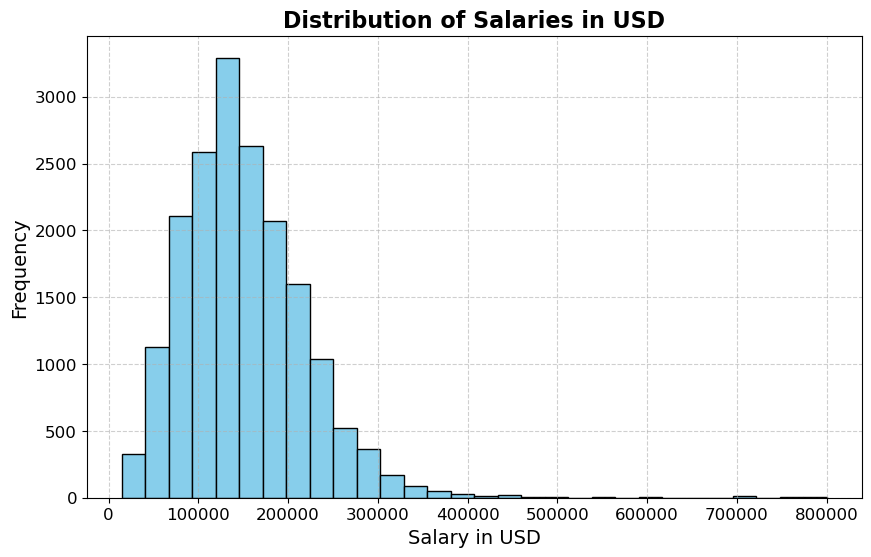

In [18]:
# Exploratory Data Analysis
# Plot histogram of salaries in USD

# Customizing the histogram for 'salary_in_usd'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(salaries_df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')  # Customize bins and colors

# Adding labels and title
plt.title('Distribution of Salaries in USD', fontsize=16, fontweight='bold')
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customizing grid and style
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid with a dashed line
plt.xticks(fontsize=12)  # Adjust x-axis tick labels size
plt.yticks(fontsize=12)  # Adjust y-axis tick labels size

# Show the plot
plt.show()


In [19]:
# Check for missing values
salaries_df.isnull().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

array([[<Axes: title={'center': 'log2_salary_in_usd'}>]], dtype=object)

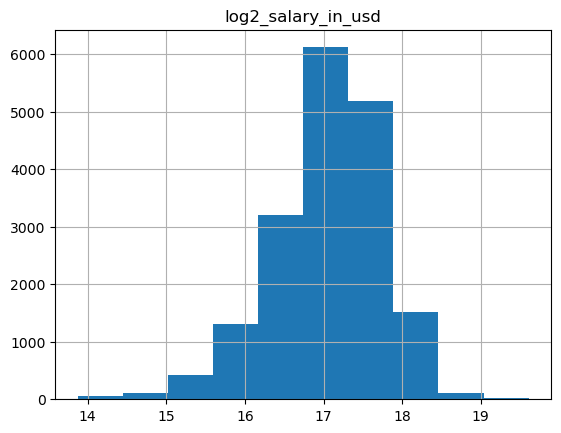

In [20]:
# Transform salary column using log base 2 and plot histogram
salaries_df['log2_salary_in_usd'] = np.log2(salaries_df['salary_in_usd'])
salaries_df.hist('log2_salary_in_usd')


In [21]:
# Value counts for different categorical columns
print(salaries_df["job_title"].value_counts())
print(salaries_df["work_year"].value_counts())
print(salaries_df["experience_level"].value_counts())
print(salaries_df["employment_type"].value_counts())
print(salaries_df["salary_currency"].value_counts())
print(salaries_df["employee_residence"].value_counts())
print(salaries_df["company_location"].value_counts())
print(salaries_df["company_size"].value_counts())


job_title
Data Scientist                      4284
Data Engineer                       3724
Data Analyst                        2604
Machine Learning Engineer           2030
Research Scientist                   715
                                    ... 
Analytics Engineering Manager          1
Quantitative Research Analyst          1
Marketing Data Scientist               1
Lead AI Engineer                       1
AI Software Development Engineer       1
Name: count, Length: 143, dtype: int64
work_year
2023    8519
2024    7589
2022    1655
2021     218
2020      75
Name: count, dtype: int64
experience_level
SE    11486
MI     4584
EN     1463
EX      523
Name: count, dtype: int64
employment_type
FT    17974
PT       38
CT       30
FL       14
Name: count, dtype: int64
salary_currency
USD    16772
GBP      644
EUR      459
CAD       59
INR       56
AUD       12
PLN        8
CHF        8
SGD        6
BRL        5
DKK        4
JPY        4
HUF        3
TRY        3
THB        2
NOK    

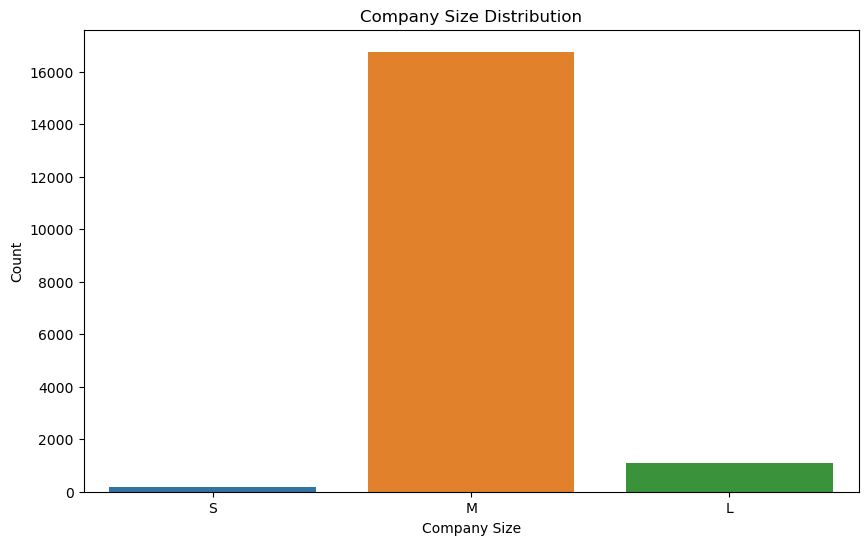

In [22]:
# Visualize company size distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', data=salaries_df)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

In [23]:
salaries_df.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'log2_salary_in_usd'],
      dtype='object')

In [25]:

# Label Encoding for categorical columns
le = LabelEncoder()
salaries_df['company_size'] = le.fit_transform(salaries_df['company_size'])



In [26]:
# Train-test split
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio,company_size,log2_salary_in_usd
count,18056.000000,1.805600e+04,18056.000000,18056.000000,18056.000000,18056.000000
mean,2023.292036,1.638751e+05,150856.152913,30.884471,0.950210,17.049557
std,0.715810,3.265629e+05,68728.941915,45.828340,0.262514,0.695918
min,2020.000000,1.400000e+04,15000.000000,0.000000,0.000000,13.872675
25%,2023.000000,1.040000e+05,103500.000000,0.000000,1.000000,16.659271
50%,2023.000000,1.430000e+05,142200.000000,0.000000,1.000000,17.117562
75%,2024.000000,1.900000e+05,188500.000000,100.000000,1.000000,17.524205
max,2024.000000,3.040000e+07,800000.000000,100.000000,2.000000,19.609640


In [27]:
# Select only numeric columns and compute correlations
numeric_salaries_df = salaries_df.select_dtypes(include=[np.number])
corr = numeric_salaries_df.corr()
print(corr["log2_salary_in_usd"])


work_year             0.105955
salary                0.093015
salary_in_usd         0.930710
remote_ratio         -0.061569
company_size          0.006793
log2_salary_in_usd    1.000000
Name: log2_salary_in_usd, dtype: float64


In [28]:
# Check DataFrame info
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           18056 non-null  int64  
 1   experience_level    18056 non-null  object 
 2   employment_type     18056 non-null  object 
 3   job_title           18056 non-null  object 
 4   salary              18056 non-null  int64  
 5   salary_currency     18056 non-null  object 
 6   salary_in_usd       18056 non-null  int64  
 7   employee_residence  18056 non-null  object 
 8   remote_ratio        18056 non-null  int64  
 9   company_location    18056 non-null  object 
 10  company_size        18056 non-null  int64  
 11  log2_salary_in_usd  18056 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 1.7+ MB


In [29]:
# Select object type columns
salaries_df_obj = salaries_df.select_dtypes(include=['object'])
print(salaries_df_obj)


      experience_level employment_type                 job_title  \
0                   MI              FT        Analytics Engineer   
1                   SE              FT              AI Developer   
2                   SE              FT              AI Developer   
3                   MI              FT            Data Scientist   
4                   MI              FT            Data Scientist   
...                ...             ...                       ...   
18051               SE              FT            Data Scientist   
18052               MI              FT  Principal Data Scientist   
18053               EN              FT            Data Scientist   
18054               EN              CT     Business Data Analyst   
18055               SE              FT            Data Scientist   

      salary_currency employee_residence company_location  
0                 CAD                 CA               CA  
1                 USD                 US               US  
2  

<Axes: title={'center': 'log2_salary_in_usd'}, xlabel='experience_level'>

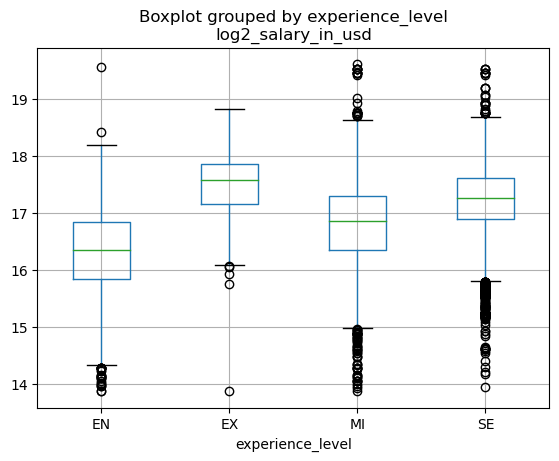

In [32]:
# Boxplot of log2_salary_in_usd by experience_level
salaries_df.boxplot("log2_salary_in_usd", by="experience_level")


In [33]:
# Encode additional columns for modeling
predictor = ["work_year", "remote_ratio"]
salaries_df['experience_level'] = le.fit_transform(salaries_df['experience_level'])
salaries_df['work_year'] = le.fit_transform(salaries_df['work_year'])
salaries_df['remote_ratio'] = le.fit_transform(salaries_df['remote_ratio'])


In [34]:
# Value counts of encoded columns
print(salaries_df["work_year"].value_counts())
print(salaries_df["remote_ratio"].value_counts())
print(salaries_df["experience_level"].value_counts())


work_year
3    8519
4    7589
2    1655
1     218
0      75
Name: count, dtype: int64
remote_ratio
0    12355
2     5452
1      249
Name: count, dtype: int64
experience_level
3    11486
2     4584
0     1463
1      523
Name: count, dtype: int64


<Axes: title={'center': 'log2_salary_in_usd'}, xlabel='employment_type'>

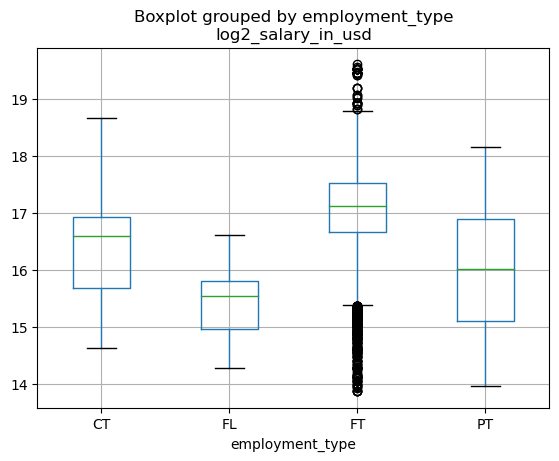

In [36]:
# Boxplot of log2_salary_in_usd by employment_type
salaries_df.boxplot("log2_salary_in_usd", by="employment_type")


In [37]:
# Encode remaining categorical columns
salaries_df['employment_type'] = le.fit_transform(salaries_df['employment_type'])
salaries_df['job_title'] = le.fit_transform(salaries_df['job_title'])
salaries_df['salary_currency'] = le.fit_transform(salaries_df['salary_currency'])
salaries_df['employee_residence'] = le.fit_transform(salaries_df['employee_residence'])
salaries_df['company_location'] = le.fit_transform(salaries_df['company_location'])


<Axes: title={'center': 'log2_salary_in_usd'}, xlabel='company_location'>

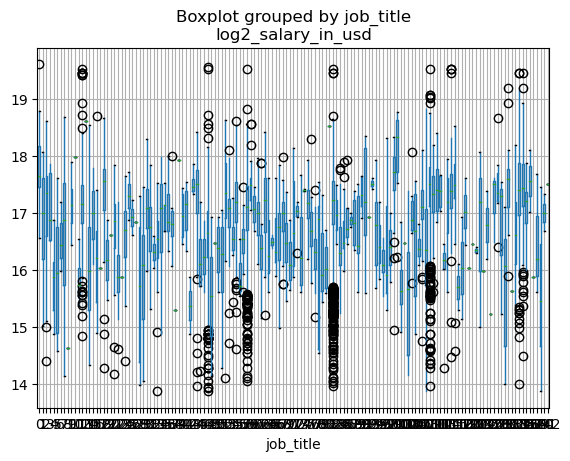

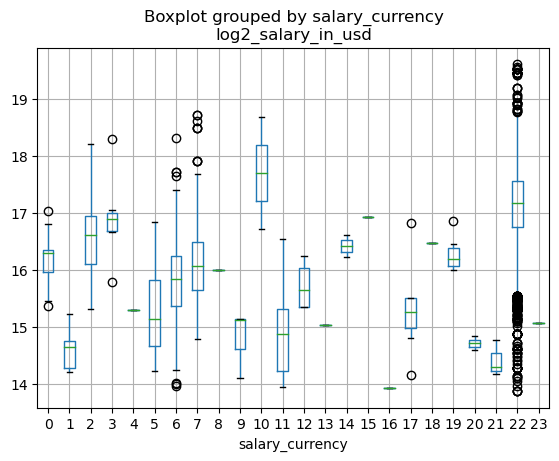

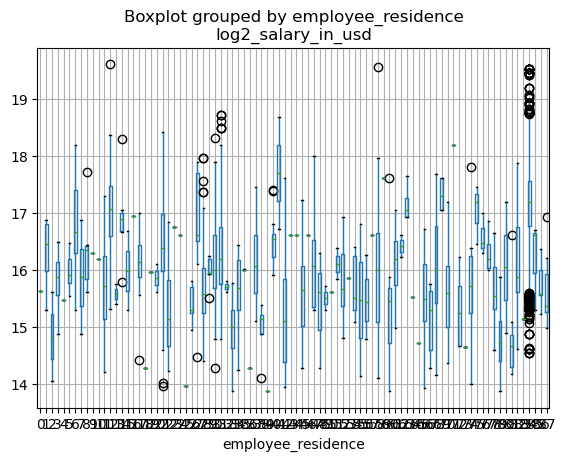

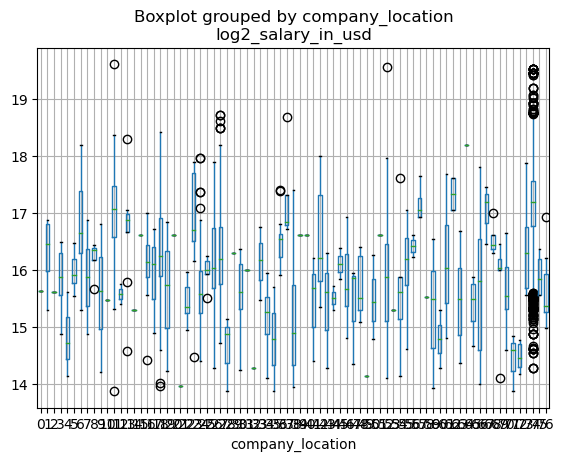

In [38]:
# Boxplot of log2_salary_in_usd by various features
salaries_df.boxplot("log2_salary_in_usd", by="job_title")
salaries_df.boxplot("log2_salary_in_usd", by="salary_currency")
salaries_df.boxplot("log2_salary_in_usd", by="employee_residence")
salaries_df.boxplot("log2_salary_in_usd", by="company_location")


In [39]:
# Extend the predictor list
predictor.extend(["experience_level", "employment_type", "job_title", 
                  "salary_currency", "employee_residence", "company_location"])

# Define X and y for the model
X = salaries_df[predictor]
y = salaries_df["log2_salary_in_usd"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [40]:
# Linear Regression model
salaries_lr = LinearRegression()
salaries_lr.fit(X_train, y_train)


LinearRegression()

In [41]:
# Scores for training and testing sets
train_score = salaries_lr.score(X_train, y_train)
test_score = salaries_lr.score(X_test, y_test)
print('Linear Regression on training data = ', train_score)
print('Linear Regression on test data = ', test_score)


Linear Regression on training data =  0.3044172876102835
Linear Regression on test data =  0.29590135461263667


In [42]:
# Coefficients and Intercept
print('Coefficients:', salaries_lr.coef_)
print('Intercept:', salaries_lr.intercept_)


Coefficients: [ 0.04919436 -0.02055946  0.22441414  0.12482337  0.00385238  0.056941
  0.00680641 -0.00474869]
Intercept: 14.435333685242595


In [43]:
# Make predictions
y_predict_train = salaries_lr.predict(X_train)
y_predict_test = salaries_lr.predict(X_test)

In [44]:
# Mean Squared Error and R2 Score for train and test sets
mse_train = mean_squared_error(y_train, y_predict_train)
mse_test = mean_squared_error(y_test, y_predict_test)
print('MSE on train set:', mse_train)
print('MSE on test set:', mse_test)

print('R2 score on train set:', r2_score(y_train, y_predict_train))
print('R2 score on test set:', r2_score(y_test, y_predict_test))


MSE on train set: 0.34005160426695946
MSE on test set: 0.3312659897885143
R2 score on train set: 0.3044172876102835
R2 score on test set: 0.29590135461263667


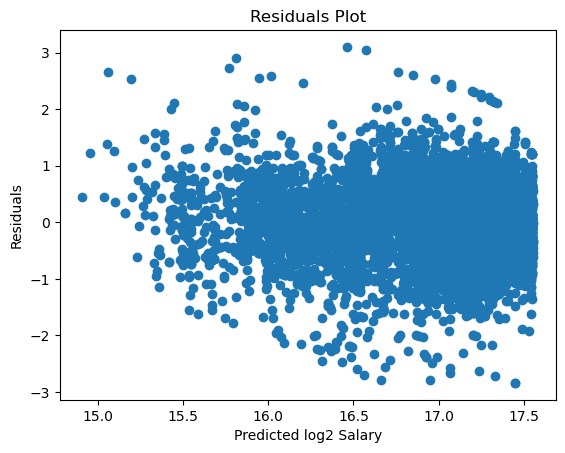

In [47]:
# Plot residuals
residuals = y_train - y_predict_train
plt.scatter(y_predict_train, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted log2 Salary')
plt.ylabel('Residuals')
plt.show()



In [46]:
# Print residuals sum (should be near zero)
print('Sum of residuals:', residuals.sum().round())


Sum of residuals: -0.0
